In [1]:
import pandas as pd
import numpy as np
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import requests
import json
from urllib.request import urlretrieve
from bs4 import BeautifulSoup
from collections import defaultdict

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
earthquakes = pd.read_csv('../data/earthquakes_wikitable.csv')
earthquakes

,origin_utc,date_ymd,time,country,lat,long,depth_km,magnitude,magnitude_num,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths,other_source_deaths_new,osd1,osd2,osd3,max_deaths
0,1900-05-11 17:23,1900-05-11,17:23,Japan,38.700,141.100,5.0,7.0 MJMA,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,1900-07-12,06:25,Turkey,40.300,43.100,NaN,5.9 Muk,5.9,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,140.0
2,1900-10-29 09:11,1900-10-29,09:11,Venezuela,11.000,-66.000,0.0,7.7 Mw,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,1901-02-15,00:00,China,26.000,100.100,0.0,6.5 Ms,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,1901-03-31,07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,6.4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2011-03-24 20:25,2011-03-24,20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0,150.0,NaN,NaN,150.0
1336,2011-04-07 14:32,2011-04-07,14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,2011-09-18,12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,6.9,L,NaN,NaN,NaN,NaN,111,111.0,111.0,NaN,NaN,111.0
1338,2011-09-23 10:41,2011-09-23,10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0,601.0,NaN,NaN,601.0


In [7]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origin_utc               1340 non-null   object 
 1   date_ymd                 1340 non-null   object 
 2   time                     1332 non-null   object 
 3   country                  1340 non-null   object 
 4   lat                      1325 non-null   object 
 5   long                     1325 non-null   object 
 6   depth_km                 1249 non-null   float64
 7   magnitude                1339 non-null   object 
 8   magnitude_num            1338 non-null   float64
 9   secondary_effects        373 non-null    object 
 10  pde_shaking_deaths       738 non-null    float64
 11  pde_total_deaths         749 non-null    float64
 12  utsu_total_deaths        1027 non-null   float64
 13  em_dat_total_deaths      559 non-null    float64
 14  other_source_deaths     

''

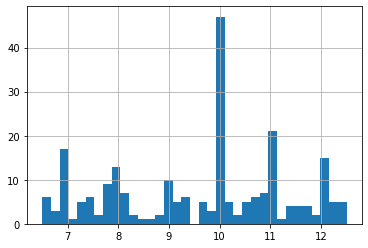

In [8]:
earthquakes['depth_km'].hist(bins = 35, range=[6.5, 12.5])
;

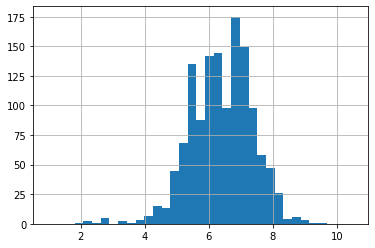

In [9]:
earthquakes['magnitude_num'].hist(bins = 35, range=[1, 10.5]);

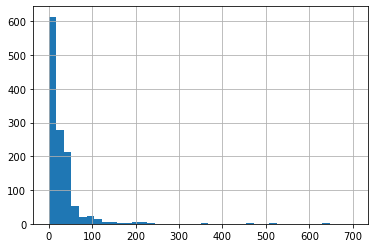

In [10]:
earthquakes['depth_km'].hist(bins = 40, range=[0,700]);

In [11]:
#earthquakes['time'] = pd.to_datetime(earthquakes['time'])
#earthquakes.info()

In [12]:
earthquakes.corr(method='pearson')

,depth_km,magnitude_num,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths_new,osd1,osd2,osd3,max_deaths
depth_km,1.000000,0.164748,-0.015792,-0.011442,-0.022681,-0.024908,0.189265,0.172676,1.0,NaN,-0.022377
magnitude_num,0.164748,1.000000,0.085692,0.128050,0.154792,0.222803,0.448148,0.427166,1.0,NaN,0.139651
pde_shaking_deaths,-0.015792,0.085692,1.000000,0.994107,0.954850,0.924447,0.764003,0.764003,NaN,NaN,0.993060
pde_total_deaths,-0.011442,0.128050,0.994107,1.000000,0.977493,0.949703,0.999928,0.999959,1.0,NaN,0.999791
utsu_total_deaths,-0.022681,0.154792,0.954850,0.977493,1.000000,0.924472,0.950601,0.950601,NaN,NaN,0.893445
em_dat_total_deaths,-0.024908,0.222803,0.924447,0.949703,0.924472,1.000000,0.943598,0.943598,NaN,NaN,0.901092
other_source_deaths_new,0.189265,0.448148,0.764003,0.999928,0.950601,0.943598,1.000000,0.994342,1.0,NaN,0.995670
osd1,0.172676,0.427166,0.764003,0.999959,0.950601,0.943598,0.994342,1.000000,1.0,NaN,0.990688
osd2,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.0,NaN,1.000000
osd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Thoughts?  

* The correlations between max_deaths and all other factors are pretty weak  
* There's small to moderate relationship between magnitude and other source deaths (r=0.45)  
* Depth (km) has a weak negative correlation with max deaths (r=-0.02)

These are interesting (non-findings). Let's read in some other data to tell us something useful for how we go about analyzing earthquake data and proposing emergency response plans.

In [13]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origin_utc               1340 non-null   object 
 1   date_ymd                 1340 non-null   object 
 2   time                     1332 non-null   object 
 3   country                  1340 non-null   object 
 4   lat                      1325 non-null   object 
 5   long                     1325 non-null   object 
 6   depth_km                 1249 non-null   float64
 7   magnitude                1339 non-null   object 
 8   magnitude_num            1338 non-null   float64
 9   secondary_effects        373 non-null    object 
 10  pde_shaking_deaths       738 non-null    float64
 11  pde_total_deaths         749 non-null    float64
 12  utsu_total_deaths        1027 non-null   float64
 13  em_dat_total_deaths      559 non-null    float64
 14  other_source_deaths     

In [14]:
earthquakes.tail()

,origin_utc,date_ymd,time,country,lat,long,depth_km,magnitude,magnitude_num,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths,other_source_deaths_new,osd1,osd2,osd3,max_deaths
1335,2011-03-24 20:25,2011-03-24,20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0,150.0,NaN,NaN,150.0
1336,2011-04-07 14:32,2011-04-07,14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,2011-09-18,12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,6.9,L,NaN,NaN,NaN,NaN,111,111.0,111.0,NaN,NaN,111.0
1338,2011-09-23 10:41,2011-09-23,10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0,601.0,NaN,NaN,601.0
1339,2018-08-05 19:46,2018-08-05,19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Extract year into separate column for merge
earthquakes['year'] = earthquakes['date_ymd'].str.extract('(\d{4})')
earthquakes['year']

0       1900
1       1900
2       1900
3       1901
4       1901
        ... 
1335    2011
1336    2011
1337    2011
1338    2011
1339    2018
Name: year, Length: 1340, dtype: object

In [16]:
# rename country column for merge
earthquakes.columns = ['origin_utc', 'date_ymd', 'time', 'country_old', 'lat', 'long', 'depth_km', 'magnitude', 'magnitude_num', 'secondary_effects', 'pde_shaking_deaths', 'pde_total_deaths', 'utsu_total_deaths', 'em_dat_total_deaths', 'other_source_deaths', 'other_source_deaths_new', 'osd1', 'osd2', 'osd3', 'max_deaths', 'year']

In [17]:
# clean up country info...there are too many values that have extra information in parentheses
earthquakes['country'] = earthquakes['country_old'].str.extract('(^\w+)')
earthquakes['country']

0           Japan
1          Turkey
2       Venezuela
3           China
4        Bulgaria
          ...    
1335        Burma
1336        Japan
1337        India
1338       Turkey
1339    Indonesia
Name: country, Length: 1340, dtype: object

In [18]:
earthquakes['country'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria', 'New',
       'Azerbaijan', 'Guatemala', 'Australia', 'Uzbekistan', 'Palestine',
       'Greece', 'Iran', 'Taiwan', 'India', 'Albania', 'Italy', 'Ecuador',
       'United', 'Chile', 'Indonesia', 'Jamaica', 'Mexico', 'Philippines',
       'Tajikistan', 'Portugal', 'France', 'Pakistan', 'Algeria',
       'Kazakhstan', 'Kyrgyzstan', 'Iceland', 'Burma', 'Peru', 'El',
       'Colombia', 'Russian', 'Puerto', 'Papua', 'Georgia', 'Argentina',
       'Eritrea', 'Bangladesh', 'Nicaragua', 'Mandatory', 'Turkmenistan',
       'Saint', 'Kingdom', 'Armenia', 'England', 'Solomon', 'Cuba',
       'Nepal', 'Ghana', 'Romania', 'Yemen', 'Canada', 'Dominican',
       'Tajik', 'Haiti', 'Cyprus', 'Fiji', 'Egypt', 'Costa', 'Hungary',
       'Syrian', 'Afghanistan', 'Tunisia', 'Mongolia', 'US', 'Morocco',
       'Democratic', 'Ethiopia', 'Macedonia', 'Tanzania', 'South',
       'Bosnia', 'Vanuatu', 'Panama', 'Montenegro', 'Honduras',
       'Yugoslav

In [19]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origin_utc               1340 non-null   object 
 1   date_ymd                 1340 non-null   object 
 2   time                     1332 non-null   object 
 3   country_old              1340 non-null   object 
 4   lat                      1325 non-null   object 
 5   long                     1325 non-null   object 
 6   depth_km                 1249 non-null   float64
 7   magnitude                1339 non-null   object 
 8   magnitude_num            1338 non-null   float64
 9   secondary_effects        373 non-null    object 
 10  pde_shaking_deaths       738 non-null    float64
 11  pde_total_deaths         749 non-null    float64
 12  utsu_total_deaths        1027 non-null   float64
 13  em_dat_total_deaths      559 non-null    float64
 14  other_source_deaths     

In [20]:
earthquakes.describe()

,depth_km,magnitude_num,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths_new,osd1,osd2,osd3,max_deaths
count,1249.000000,1338.000000,738.000000,749.000000,1027.000000,559.000000,37.000000,37.000000,2.000000,1.0,1273.000000
mean,29.550681,6.399178,1506.390244,2019.323097,1580.013632,3319.295170,19566.648649,18161.243243,154500.000000,227898.0,2478.362922
std,44.899987,0.967431,24589.605189,26877.253336,12620.035353,18661.234365,59983.906334,53945.531960,181726.442765,NaN,24002.086927
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,26000.000000,227898.0,0.000000
25%,10.000000,5.700000,1.000000,1.000000,2.000000,3.000000,68.000000,68.000000,90250.000000,227898.0,2.000000
50%,18.000000,6.400000,3.000000,4.000000,11.000000,17.000000,215.000000,215.000000,154500.000000,227898.0,10.000000
75%,35.000000,7.100000,16.750000,24.000000,103.000000,181.500000,2489.000000,2489.000000,218750.000000,227898.0,92.000000
max,644.600000,9.500000,655237.000000,655237.000000,242800.000000,242000.000000,283000.000000,231000.000000,283000.000000,227898.0,655237.000000


In [21]:
earthquakes['magnitude'].describe()

count       1339
unique       176
top       7.2 Mw
freq          46
Name: magnitude, dtype: object

In [22]:
# change year to a float
earthquakes['year'] = pd.to_numeric(earthquakes['year'])
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origin_utc               1340 non-null   object 
 1   date_ymd                 1340 non-null   object 
 2   time                     1332 non-null   object 
 3   country_old              1340 non-null   object 
 4   lat                      1325 non-null   object 
 5   long                     1325 non-null   object 
 6   depth_km                 1249 non-null   float64
 7   magnitude                1339 non-null   object 
 8   magnitude_num            1338 non-null   float64
 9   secondary_effects        373 non-null    object 
 10  pde_shaking_deaths       738 non-null    float64
 11  pde_total_deaths         749 non-null    float64
 12  utsu_total_deaths        1027 non-null   float64
 13  em_dat_total_deaths      559 non-null    float64
 14  other_source_deaths     

In [23]:
# # Read in gdp data
# gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6729)
# # Check to make sure that all rows got read in
# gdp_df.tail()

FileNotFoundError: [Errno 2] File ../data/gdp_per_capita.csv does not exist: '../data/gdp_per_capita.csv'

In [ ]:
gdp_df = (gdp_df
          .drop(columns = 'Value Footnotes')
          .rename(columns = {'Country or Area': 'country', 'Year': 'year', 'Value': 'gdp_per_capita'})
         )

gdp_df.shape

In [ ]:
gdp_df['year'] = pd.to_numeric(gdp_df['year'])
gdp_df.info()

In [ ]:
# what years are present in this dataset?
gdp_df.groupby('year')['year'].count().sort_values()

In [ ]:
# read in continents data
continents = pd.read_csv('../data/continents.csv')
continents.head()

In [ ]:
continents = continents.rename(columns = {'Continent': 'continent', 'Country': 'country'})
continents.head()

In [ ]:
# merge all three data sets, starting with continents and then GDP
# use a left join so that all values conform to the earthquakes dataframe (or are otherwise left out)

In [ ]:
# perform .corr on new dataframe